<a href="https://colab.research.google.com/github/oimartin/dog_cat_redux_kernelED/blob/main/reading_in_image_files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ingest

## Libraries

In [45]:
import os, cv2, random, shutil
import numpy as np
import pandas as pd
from google.colab import files
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from time import time
from keras.models import Sequential
from keras import layers


## Load Data with Kaggle API

In [13]:
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [14]:
! cp kaggle.json ~/.kaggle/

In [15]:
!pwd

/content


In [16]:
! chmod 600 ~/.kaggle/kaggle.json

In [18]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 97% 262M/271M [00:04<00:00, 94.4MB/s]
100% 271M/271M [00:04<00:00, 67.1MB/s]
100% 541M/544M [00:03<00:00, 182MB/s]
100% 544M/544M [00:03<00:00, 159MB/s]
  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 35.9MB/s]


In [19]:
!mkdir train_img
!mkdir test_img

mkdir: cannot create directory ‘train_img’: File exists
mkdir: cannot create directory ‘test_img’: File exists


In [20]:
!unzip train.zip -d train_img

Streaming output truncated to the last 5000 lines.
  inflating: train_img/train/dog.5499.jpg  
  inflating: train_img/train/dog.55.jpg  
  inflating: train_img/train/dog.550.jpg  
  inflating: train_img/train/dog.5500.jpg  
  inflating: train_img/train/dog.5501.jpg  
  inflating: train_img/train/dog.5502.jpg  
  inflating: train_img/train/dog.5503.jpg  
  inflating: train_img/train/dog.5504.jpg  
  inflating: train_img/train/dog.5505.jpg  
  inflating: train_img/train/dog.5506.jpg  
  inflating: train_img/train/dog.5507.jpg  
  inflating: train_img/train/dog.5508.jpg  
  inflating: train_img/train/dog.5509.jpg  
  inflating: train_img/train/dog.551.jpg  
  inflating: train_img/train/dog.5510.jpg  
  inflating: train_img/train/dog.5511.jpg  
  inflating: train_img/train/dog.5512.jpg  
  inflating: train_img/train/dog.5513.jpg  
  inflating: train_img/train/dog.5514.jpg  
  inflating: train_img/train/dog.5515.jpg  
  inflating: train_img/train/dog.5516.jpg  
  inflating: train_img/train/

In [21]:
!unzip test.zip -d test_img/

Streaming output truncated to the last 5000 lines.
  inflating: test_img/test/5499.jpg  
  inflating: test_img/test/55.jpg    
  inflating: test_img/test/550.jpg   
  inflating: test_img/test/5500.jpg  
  inflating: test_img/test/5501.jpg  
  inflating: test_img/test/5502.jpg  
  inflating: test_img/test/5503.jpg  
  inflating: test_img/test/5504.jpg  
  inflating: test_img/test/5505.jpg  
  inflating: test_img/test/5506.jpg  
  inflating: test_img/test/5507.jpg  
  inflating: test_img/test/5508.jpg  
  inflating: test_img/test/5509.jpg  
  inflating: test_img/test/551.jpg   
  inflating: test_img/test/5510.jpg  
  inflating: test_img/test/5511.jpg  
  inflating: test_img/test/5512.jpg  
  inflating: test_img/test/5513.jpg  
  inflating: test_img/test/5514.jpg  
  inflating: test_img/test/5515.jpg  
  inflating: test_img/test/5516.jpg  
  inflating: test_img/test/5517.jpg  
  inflating: test_img/test/5518.jpg  
  inflating: test_img/test/5519.jpg  
  inflating: test_img/test/552.jpg   

# EDA

## First Look at Data

In [22]:
# Inspired by Jeff Delaney notebook: https://www.kaggle.com/jeffd23/catdognet-keras-convnet-starter

def get_images (directory, type=None):
    if type is None:
        images = [directory + i for i in os.listdir(directory)]
        print(f"There are {len(images)} images")
    else:
        images = [directory + i for i in os.listdir(directory) if type in i]
        print(f"There are {len(images)} {type} images")
    return images

train = '/content/train_img/train/'
test = '/content/test_img/test/'

train_images = get_images(train)
train_dogs = get_images(train, 'dog')
train_cats = get_images(train, 'cat')
test_images = get_images(test)

There are 25000 images
There are 12500 dog images
There are 12500 cat images
There are 12500 images


## Sectioning Data

In [23]:
train_images = random.sample(train_dogs, 2000) + random.sample(train_cats, 2000)
random.shuffle(train_images)

In [24]:
hmm = train_images[1]
hmm[24:]


'/dog.1456.jpg'

In [25]:
!mkdir train_subset

In [ ]:
for file in train_images:
    shutil.copy(file, f"/content/train_subset/{file[24:]}")

In [26]:
ROWS = 200
COLS = 200
CHANNELS = 3

In [27]:
def read_image (file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)
    return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)

def prep_data(images):
    count = len(images)
    data = np.ndarray((count, CHANNELS, ROWS, COLS), dtype=np.uint8)
    
    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image.T
        if i%250 == 0: print (f"Processed {i} of {count}")
    return data

train = prep_data(train_images)
print(f"Train shape {train.shape}")

Processed 0 of 4000
Processed 250 of 4000
Processed 500 of 4000
Processed 750 of 4000
Processed 1000 of 4000
Processed 1250 of 4000
Processed 1500 of 4000
Processed 1750 of 4000
Processed 2000 of 4000
Processed 2250 of 4000
Processed 2500 of 4000
Processed 2750 of 4000
Processed 3000 of 4000
Processed 3250 of 4000
Processed 3500 of 4000
Processed 3750 of 4000
Train shape (4000, 3, 200, 200)


## First View of Data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([<matplotlib.axis.XTick at 0x7f9f73ecf650>,
 [Text(0, 0, 'Dog_pic'), Text(0, 0, 'Cat_pic')])

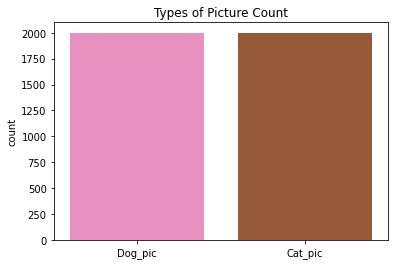

In [36]:
labels = []
for img_name in train_images:
    if 'dog' in img_name:
        labels.append(1)
    else:
        labels.append(0)


sns.set_palette('Set1_r')
sns.countplot(labels).set(title='Types of Picture Count')
plt.xticks(ticks=[0,1], labels=['Dog_pic', 'Cat_pic'])

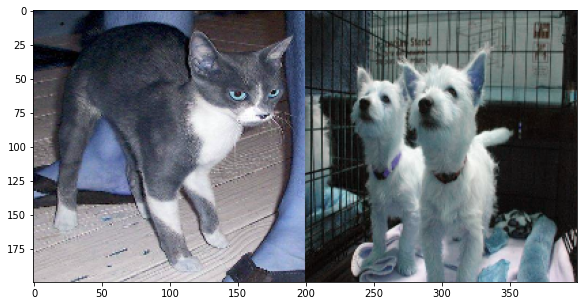

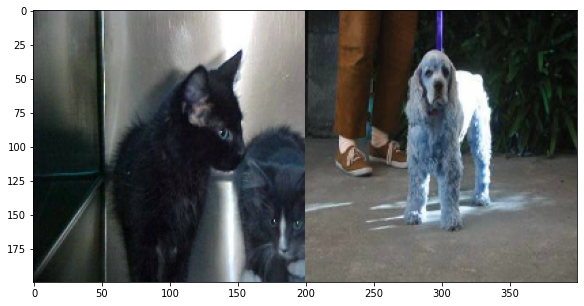

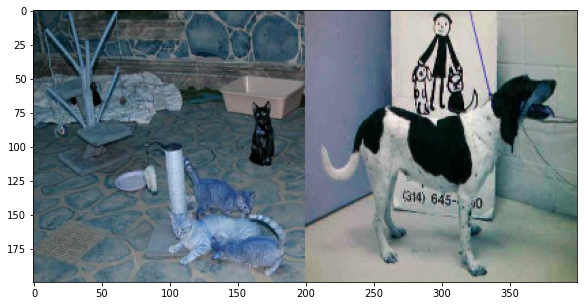

In [34]:
def show_cats_and_dogs(no):
  cat = read_image(train_cats[no])
  dog = read_image(train_dogs[no])
  pair = np.concatenate((cat, dog), axis=1)
  plt.figure(figsize=(10,5))
  plt.imshow(pair)
  plt.show()
  return
  
for img_id in range(6,9):
    show_cats_and_dogs(img_id)

Text(0.5, 1.0, 'Your Average Dog')

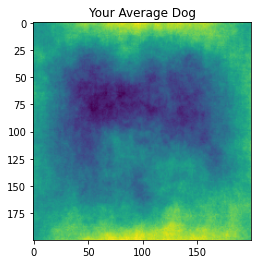

In [37]:
dog_avg = np.array([dog[0].T for i, dog in enumerate(train) if labels[i]==1]).mean(axis=0)
plt.imshow(dog_avg)
plt.title('Your Average Dog')

Text(0.5, 1.0, 'Your Average Cat')

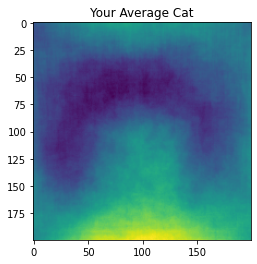

In [38]:
cat_avg = np.array([cat[0].T for i, cat in enumerate(train) if labels[i]==0]).mean(axis=0)
plt.imshow(cat_avg)
plt.title('Your Average Cat')

# Split Data

In [49]:
X_train, X_test, labels_train, labels_test = train_test_split(train,
                                                                labels,
                                                                test_size=0.2,
                                                                random_state=22)

print(f'''X_train shape {X_train.shape}
labels_train shape {len(labels_train)}
X_test shape {X_test.shape}
labels_test {len(labels_test)}
''')

X_train shape (3200, 3, 200, 200)
labels_train shape 3200
X_test shape (800, 3, 200, 200)
labels_test 800



# CNN Models

### Functions and Test Data

In [ ]:
def run_model (model, model_name, x_data, y_data):
  start = time()
  fitted_model = model.fit(x_data, y_data)
  end = time()
  runtime = round((end-start), 4)
  print(f"{model_name} took {runtime} seconds or {round((runtime/60),4)} minutes to run.")
  return fitted_model, runtime

In [40]:
test = prep_data(test_images)
print(f"Test shape {test.shape}")

Processed 0 of 12500
Processed 250 of 12500
Processed 500 of 12500
Processed 750 of 12500
Processed 1000 of 12500
Processed 1250 of 12500
Processed 1500 of 12500
Processed 1750 of 12500
Processed 2000 of 12500
Processed 2250 of 12500
Processed 2500 of 12500
Processed 2750 of 12500
Processed 3000 of 12500
Processed 3250 of 12500
Processed 3500 of 12500
Processed 3750 of 12500
Processed 4000 of 12500
Processed 4250 of 12500
Processed 4500 of 12500
Processed 4750 of 12500
Processed 5000 of 12500
Processed 5250 of 12500
Processed 5500 of 12500
Processed 5750 of 12500
Processed 6000 of 12500
Processed 6250 of 12500
Processed 6500 of 12500
Processed 6750 of 12500
Processed 7000 of 12500
Processed 7250 of 12500
Processed 7500 of 12500
Processed 7750 of 12500
Processed 8000 of 12500
Processed 8250 of 12500
Processed 8500 of 12500
Processed 8750 of 12500
Processed 9000 of 12500
Processed 9250 of 12500
Processed 9500 of 12500
Processed 9750 of 12500
Processed 10000 of 12500
Processed 10250 of 12

## Model 1

In [44]:
from keras.layers.pooling import MaxPool2D
layers4_200 = Sequential([
    layers.Conv2D(200, kernel_size=3, activation='relu',
                  input_shape=(ROWS, COLS,3)),
    layers.Conv2D(100, kernel_size=3, activation='relu'),
    layers.Flatten(),
    layers.Dense(100, activation="softmax"),
    layers.Dense(50, activation="softmax")
])
layers4_200.compile(optimizer="RMSprop", loss="binary_crossentropy function",
                    metrics=['accuracy'])

In [ ]:
run_model